<img src="TP3_consigna.png" width="800px">

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

1. Obtener una detección de logo en cada imagen sin falsos positivos.

<function matplotlib.pyplot.show(close=None, block=None)>

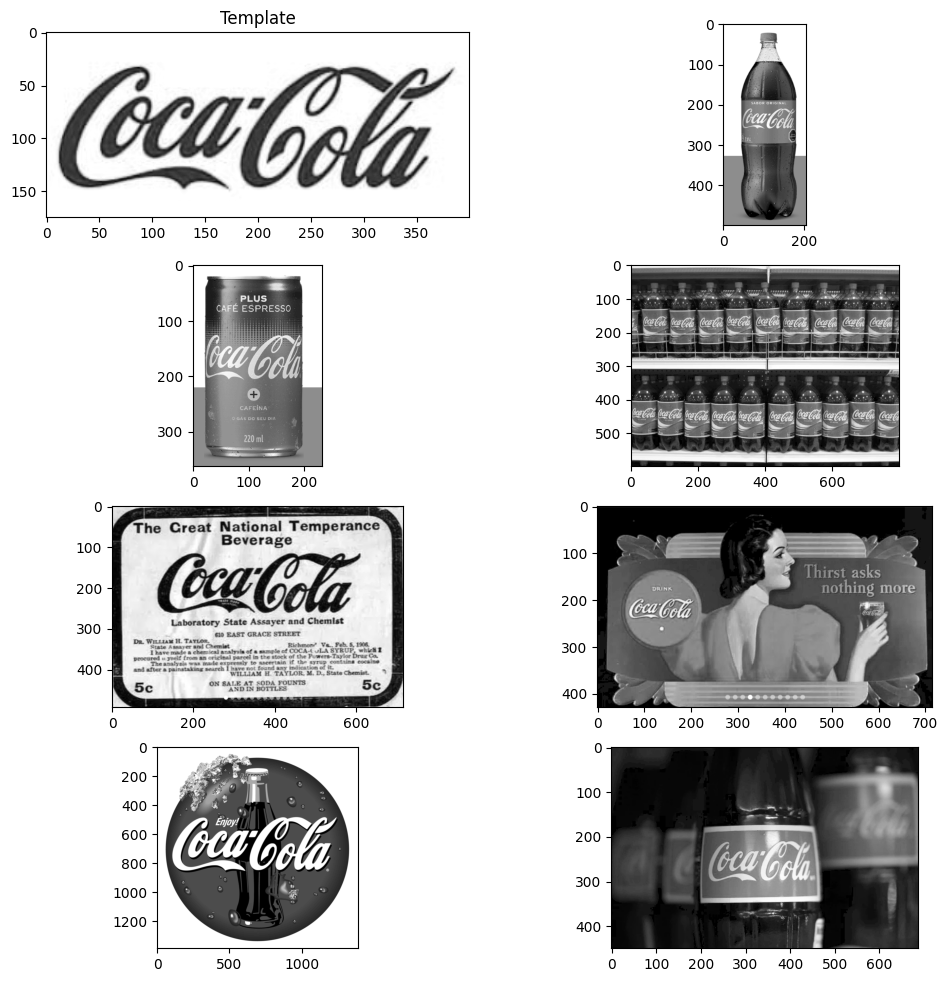

In [9]:
template = cv.imread('template/pattern.png',cv.IMREAD_GRAYSCALE)

images =[]
images.append(cv.imread('images/coca_logo_1.png'))
images.append(cv.imread('images/coca_logo_2.png'))
images.append(cv.imread('images/coca_multi.png'))
images.append(cv.imread('images/coca_retro_1.png'))
images.append(cv.imread('images/coca_retro_2.png'))
images.append(cv.imread('images/COCA-COLA-LOGO.jpg'))
images.append(cv.imread('images/logo_1.png'))

plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.title('Template')
plt.imshow(template, cmap='gray')
for i in np.arange(0,7):
    plt.subplot(4,2,i+2)
    plt.imshow(images[i], cmap='gray')
plt.show

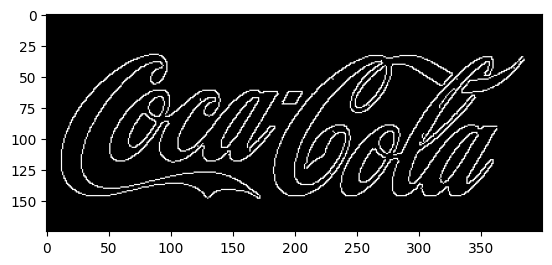

In [273]:
template_edges = cv.Canny(template, threshold1=5, threshold2=200)
plt.figure()
plt.imshow(template_edges,cmap = 'gray')
plt.show()

In [58]:
template_edg_nivel_1 = cv.pyrDown(template_edges)

In [235]:
scales = np.linspace(0.1, 3, 20)
resized_template = list()

# generamos nuestra "piramide" de tamaños arbitrarios
print(f'Dimensiones generadas:')
for scale in scales:
    resized_template.append(cv.resize(template_edges, None, fx=scale, fy=scale))
    print(resized_template[-1].shape)

Dimensiones generadas:
(18, 40)
(44, 101)
(71, 162)
(98, 223)
(124, 284)
(151, 345)
(178, 406)
(204, 467)
(231, 528)
(258, 589)
(285, 651)
(311, 712)
(338, 773)
(365, 834)
(391, 895)
(418, 956)
(445, 1017)
(472, 1078)
(498, 1139)
(525, 1200)


<function matplotlib.pyplot.show(close=None, block=None)>

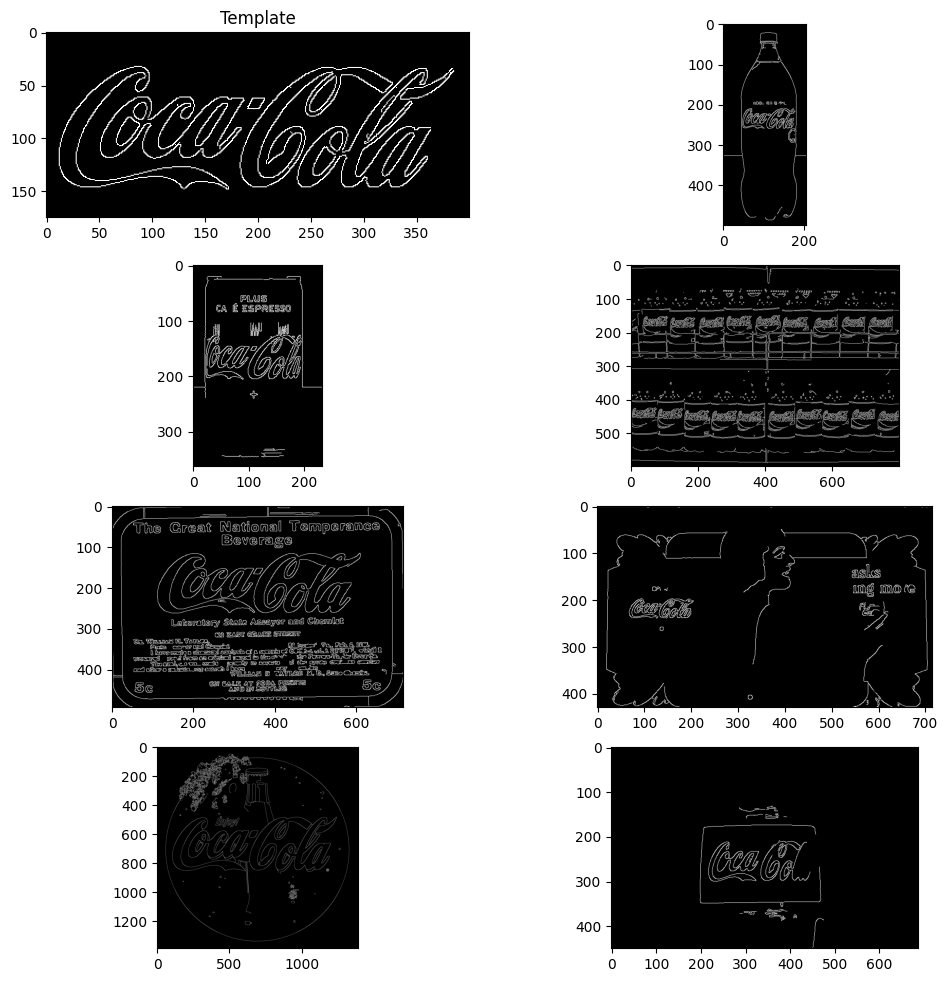

In [275]:
images_edges=[]
for img in images:
    images_edges.append(cv.Canny(img, threshold1=200, threshold2=550))

plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.title('Template')
plt.imshow(template_edges, cmap='gray')
for i in np.arange(0,7):
    plt.subplot(4,2,i+2)
    plt.imshow(images_edges[i], cmap='gray')
plt.show

3.4725 7.937142857142857
0.22914603352546692


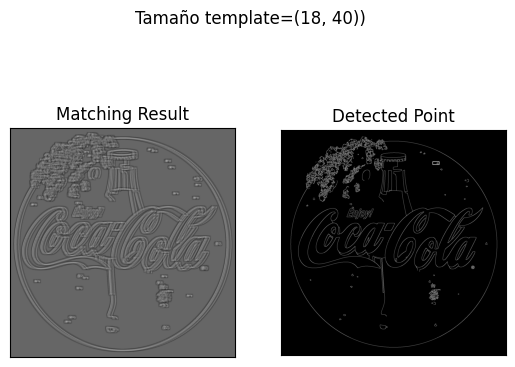

0.13854531943798065


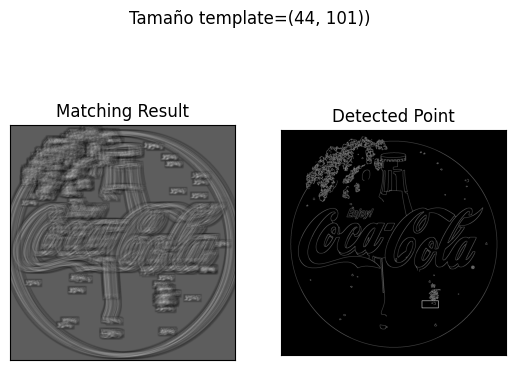

0.09077755361795425


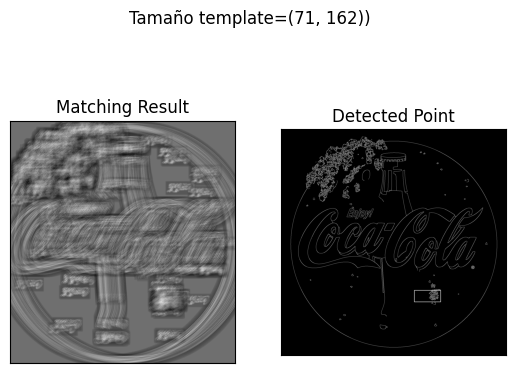

0.08912457525730133


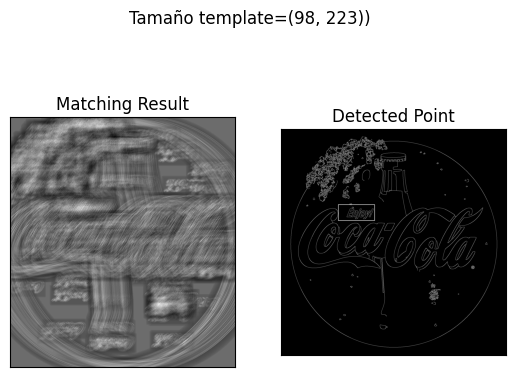

0.0768345445394516


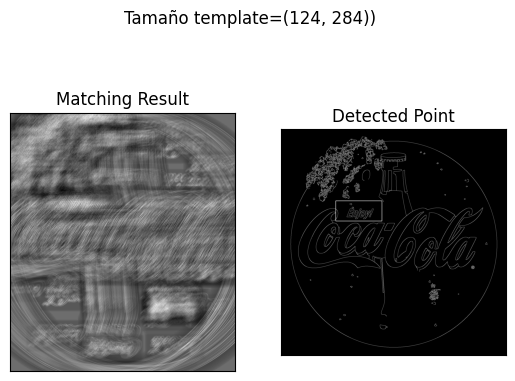

0.07523809373378754


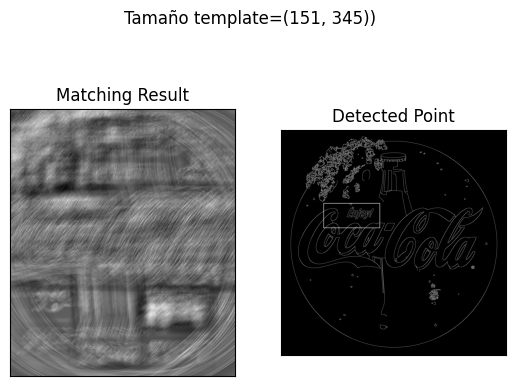

0.06299959123134613


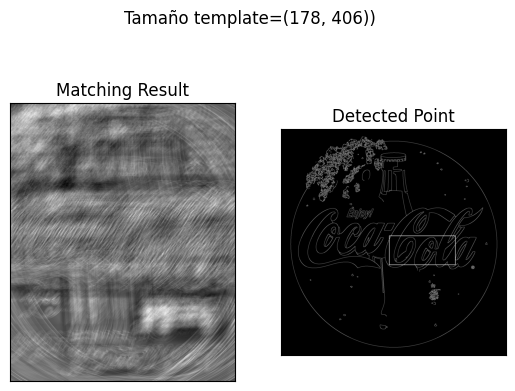

0.06579963862895966


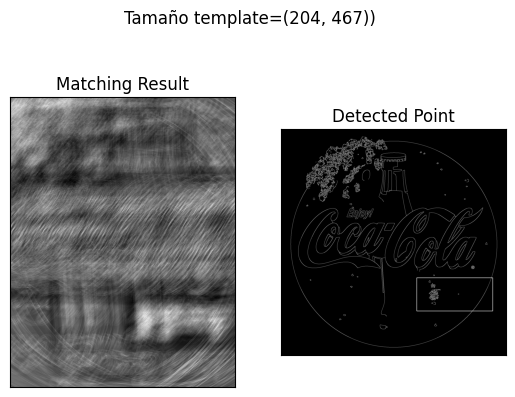

0.06919622421264648


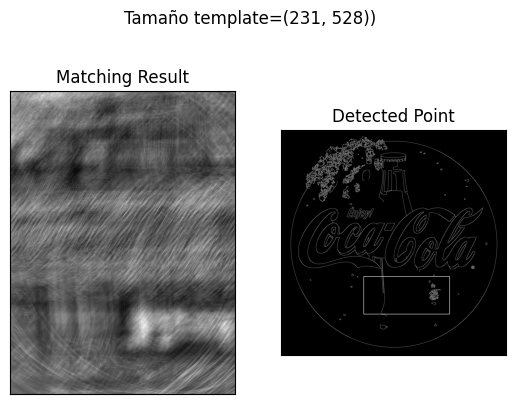

0.062357738614082336


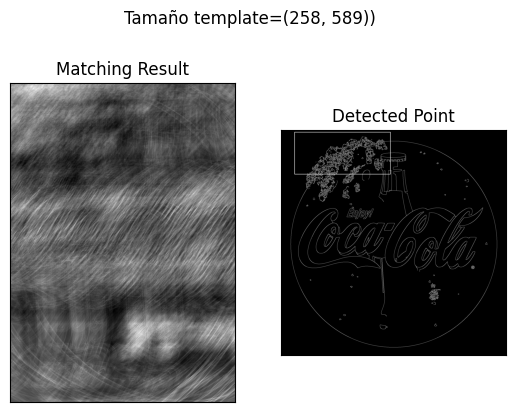

0.06854142993688583


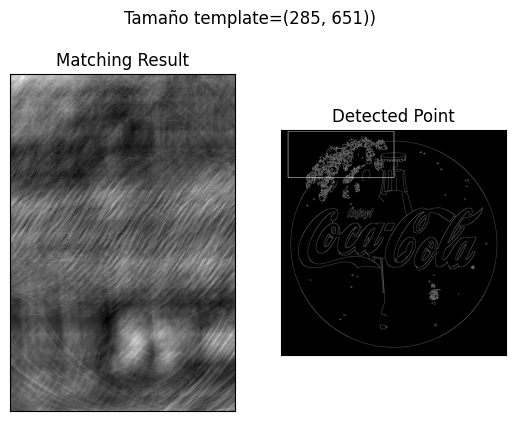

0.05540585145354271


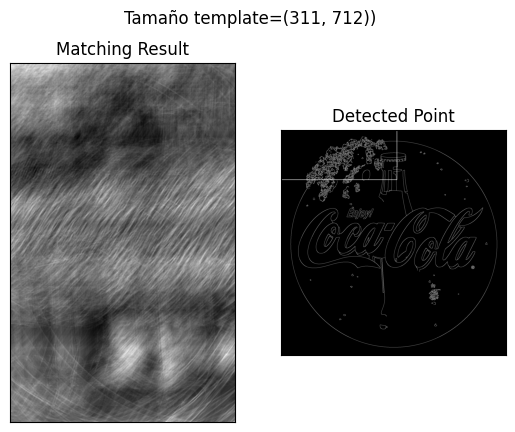

0.050337500870227814


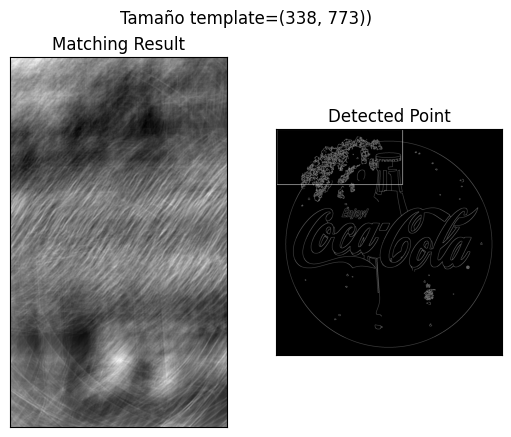

0.04541482403874397


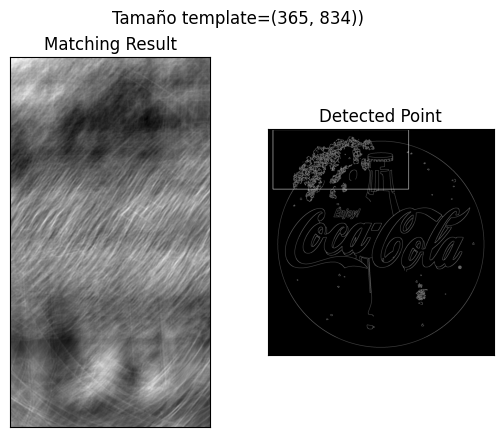

0.048451293259859085


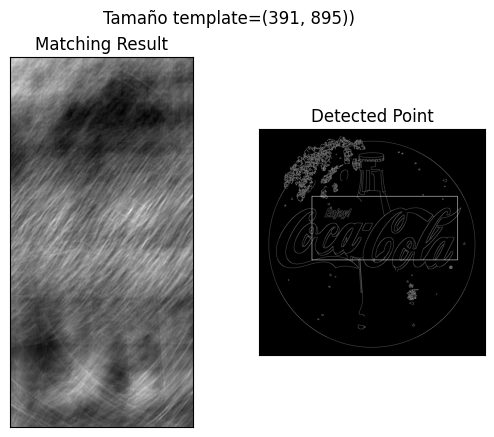

0.04186338186264038


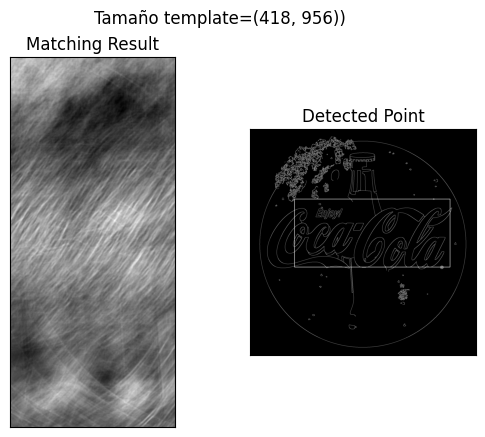

0.03946336358785629


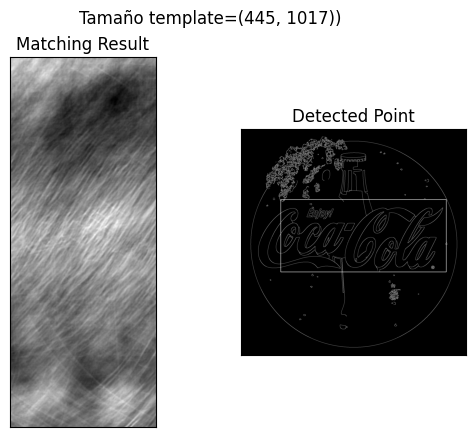

0.04471166059374809


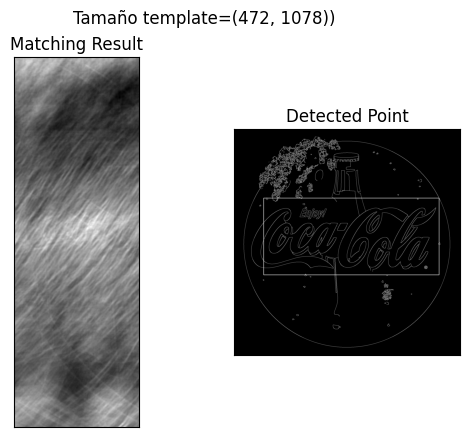

0.05091287940740585


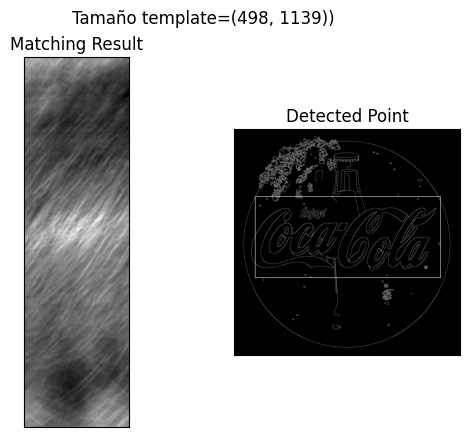

0.056172460317611694


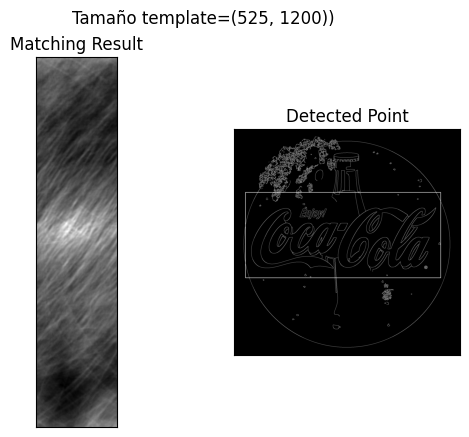

In [276]:
img=5
# Los 6 métodos posibles para comparación:
methods = 'cv.TM_CCOEFF_NORMED' #, 'cv.TM_SQDIFF_NORMED']
w,h=template_edges.shape[::-1]
wi, hi = images_edges[img].shape[::-1]
print(wi/w,hi/h)
for templ in resized_template:
    wt, ht = templ.shape[::-1]
    if (wt<wi) and (ht<hi):
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = images_edges[img].copy()
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        res = cv.matchTemplate(images_edges[img], templ, cv.TM_CCOEFF_NORMED)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        print(max_val)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + wt, top_left[1] + ht)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(f'Tamaño template={templ.shape})')
        plt.show()

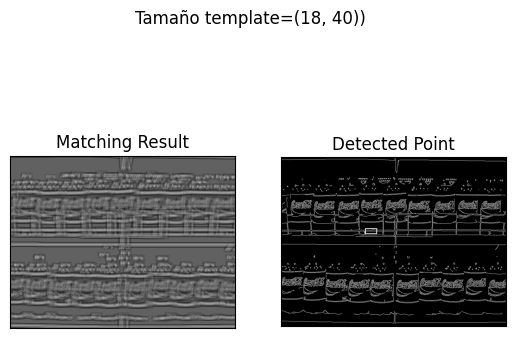

In [277]:
max_val_final=0
template_final=None
top_left=None
bottom_right=None
resultado=None

img=2
wi, hi = images_edges[img].shape[::-1]
# Hago una copia de la imagen porque le dibujo rectángulos
img_salida = images_edges[img].copy()

for templ in resized_template:
    wt, ht = templ.shape[::-1]
    if (wt<wi) and (ht<hi):
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        res = cv.matchTemplate(images_edges[img], templ, cv.TM_CCOEFF_NORMED)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        if max_val>max_val_final:
            max_val_final=max_val
            template_final=templ
            top_left=max_loc
            bottom_right = (top_left[0] + wt, top_left[1] + ht)
            resultado=res

# Marcamos el lugar donde lo haya encontrado
#----------------------------------------
cv.rectangle(img_salida,top_left, bottom_right, 255, 2)

# Graficamos el procesamiento y la salida
#----------------------------------------
plt.figure()

# Resultado de coincidencia
plt.subplot(121),plt.imshow(resultado,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

# Imagen original con recuadros
plt.subplot(122),plt.imshow(img_salida,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.suptitle(f'Tamaño template={template_final.shape})')
plt.show()

In [278]:
"""img=5
w,h=template_edges.shape[::-1]
wi, hi = images_edges[img].shape[::-1]
print(min(wi/w,hi/h))


scales = np.linspace(0.1, min(wi/w,hi/h), 10)
resized_template = list()

# generamos nuestra "piramide" de tamaños arbitrarios
print(f'Dimensiones generadas:')
for scale in scales:
    resized_template.append(cv.resize(template_edges, None, fx=scale, fy=scale))
    print(resized_template[-1].shape)


"""
def buscador_logos(template_edges,img_edges):
    w,h=template_edges.shape[::-1]
    wi, hi = img_edges.shape[::-1]
    scales = np.linspace(0.1, min(wi/w,hi/h), 50)
    resized_template = list()
    # generamos nuestra "piramide" de tamaños arbitrarios
    print(f'Dimensiones generadas:')
    for scale in scales:
        resized_template.append(cv.resize(template_edges, None, fx=scale, fy=scale))

    # Hago una copia de la imagen porque le dibujo rectángulos
    img_salida = img_edges.copy()

    max_val_final=0
    template_final=None
    top_left=None
    bottom_right=None
    resultado=None

    for templ in resized_template:
        wt, ht = templ.shape[::-1]
        if (wt<wi) and (ht<hi):
            # Aplicamos la coincidencia de patrones
            #--------------------------------------
            res = cv.matchTemplate(img_edges, templ, cv.TM_CCOEFF)
            
            # Encontramos los valores máximos y mínimos
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
            if max_val>max_val_final:
                max_val_final=max_val
                template_final=templ
                top_left=max_loc
                bottom_right = (top_left[0] + wt, top_left[1] + ht)
                resultado=res

    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    cv.rectangle(img_salida,top_left, bottom_right, 255, 2)

    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()

    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(resultado,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.suptitle(f'Tamaño template={template_final.shape})')
    plt.show()

Dimensiones generadas:


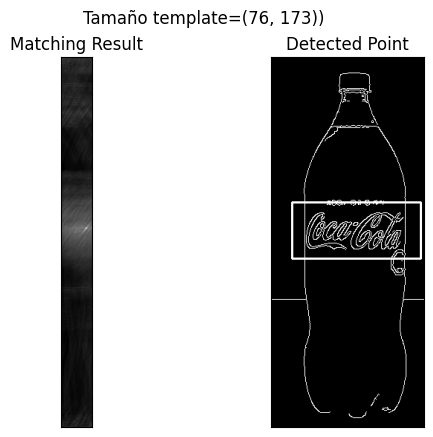

Dimensiones generadas:


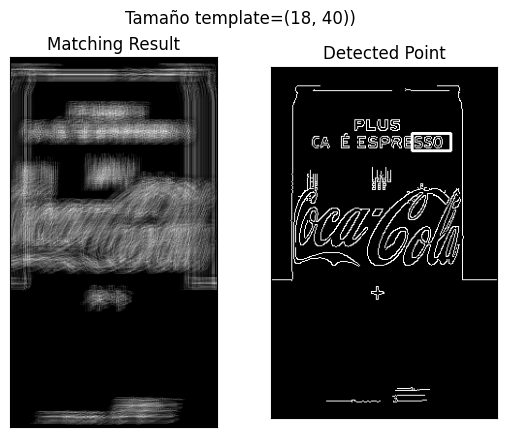

Dimensiones generadas:


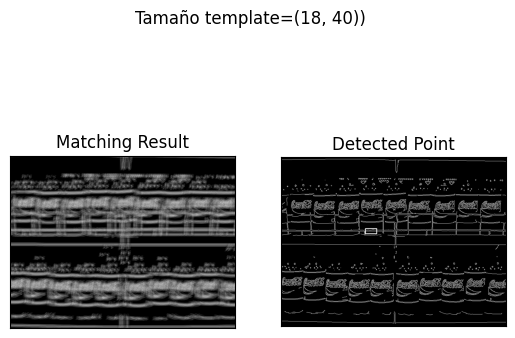

Dimensiones generadas:


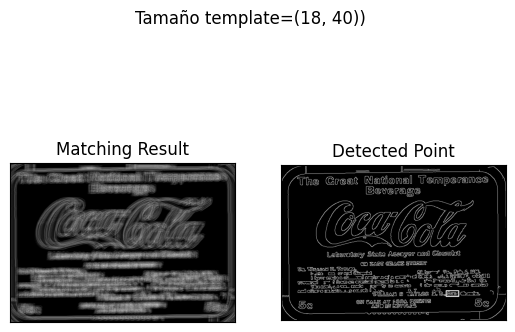

Dimensiones generadas:


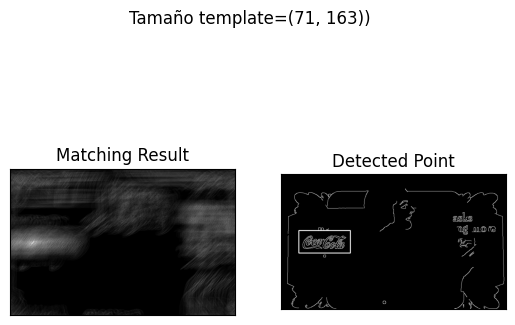

Dimensiones generadas:


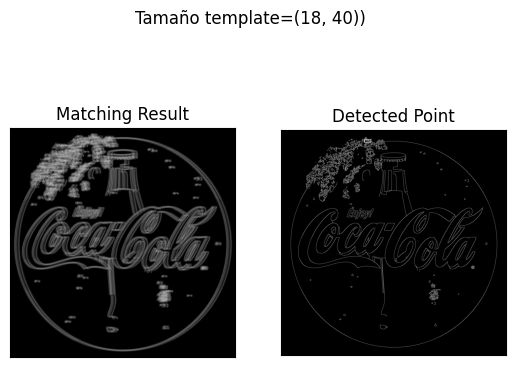

Dimensiones generadas:


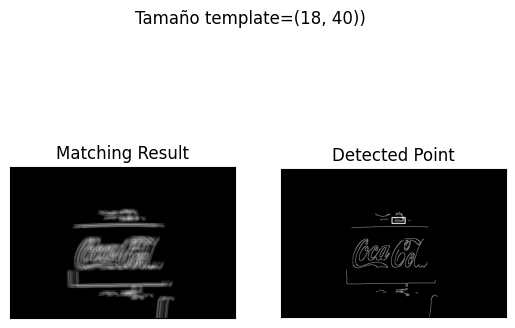

In [265]:
for img in images_edges:
 buscador_logos(template_edges,img)